# First Project (2nd Take): Giorgos Kritopoulos – 29/6/2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Question 1:

In [2]:
Nx = Ny = 101
L = 1.0
h = L / (Nx - 1)

Για τυχαίο δυναμικό phi:

In [3]:
phi = np.zeros((Nx, Ny))

phi[0, :] = 0.01
phi[-1, :] = 0
phi[:, 0] = 0.0
phi[:, -1] = 0.01

rho = np.zeros((Nx, Ny))

dipole_pos = [(Nx//3, Ny//2), (2*Nx//3, Ny//2)]
rho[dipole_pos[0]] = 1.0/h
rho[dipole_pos[1]] = -1.0/h

In [4]:
def compute_energy(phi, rho, h):
    grad_phi_sq = ((phi[1:, 1:] - phi[:-1, 1:])**2 +(phi[1:, 1:] - phi[1:, :-1])**2)
    energy = 0.5 * np.sum(grad_phi_sq) - h**2 * np.sum(rho[1:, 1:] * phi[1:, 1:])
    return energy

def gauss_seidel(phi, rho, h, tol=1e-8, max_iter=10000):
    Nx, Ny = phi.shape
    energy_old = compute_energy(phi, rho, h)
    
    for it in range(max_iter):
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                phi[i, j] = 0.25 * (
                    phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j]
                )

        energy_new = compute_energy(phi, rho, h)
        if abs(energy_new - energy_old) < tol:
            print(f'Converged after {it} iterations (energy)')
            break

        energy_old = energy_new
    else:
        print('Did not converge')
    
    return phi


In [5]:
phi = gauss_seidel(phi, rho, h)

Converged after 1762 iterations (energy)


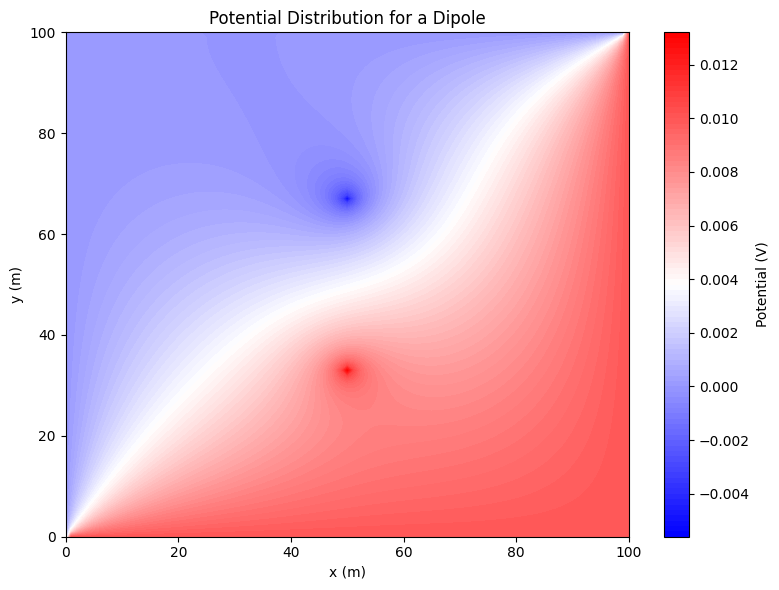

In [6]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(phi, levels=100, cmap='bwr')
plt.colorbar(cp, label='Potential (V)')
plt.title('Potential Distribution for a Dipole')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.show()

Question 2:

In [7]:
phi = np.zeros((Nx, Ny))

phi[0, :] = 0
phi[-1, :] = 0
phi[:, 0] = 0
phi[:, -1] = 0

In [8]:
phi = gauss_seidel(phi, rho, h)

Converged after 380 iterations (energy)


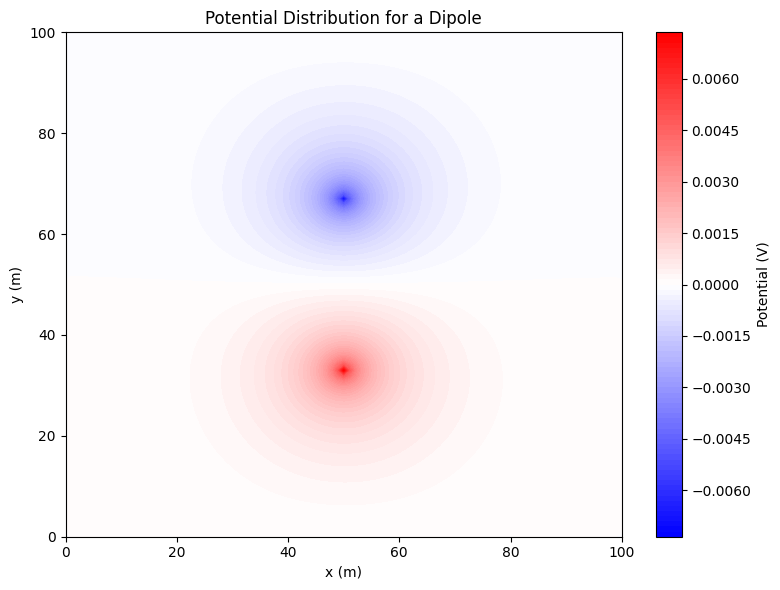

In [9]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(phi, levels=100, cmap='bwr')
plt.colorbar(cp, label='Potential (V)')
plt.title('Potential Distribution for a Dipole')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.show()

Question 3:

In [10]:
def gauss_seidel(phi, rho, h, omega=1.0, tol=1e-14, max_iter=20000):
    Nx, Ny = phi.shape
    energy_old = compute_energy(phi, rho, h)
    
    for it in range(max_iter):
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                phi_new = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])
                phi[i, j] = (1 - omega) * phi[i, j] + omega * phi_new

        energy_new = compute_energy(phi, rho, h)
        
        if abs(energy_new - energy_old) < tol:
            print(f'omega={omega}: Converged after {it} iterations (energy)')
            break

        energy_old = energy_new
        
    else:
        print(f'omega={omega}: Did not converge')
    return phi, it

In [ ]:
omega_values = [0.5, 0.7, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.1]
iterations = []

for omega in omega_values:
    phi_test = np.zeros((Nx, Ny))

    phi_test[0, :] = 0
    phi_test[-1, :] = 0
    phi_test[:, 0] = 0
    phi_test[:, -1] = 0

    phi_result, it = gauss_seidel(phi_test, rho, h, omega=omega, tol=1e-14)
    iterations.append(it)

omega=0.5: Converged after 8862 iterations (energy)
omega=0.7: Converged after 5707 iterations (energy)
omega=1.0: Converged after 3330 iterations (energy)
omega=1.2: Converged after 2474 iterations (energy)
omega=1.4: Converged after 1860 iterations (energy)
omega=1.6: Converged after 1289 iterations (energy)
omega=1.8: Converged after 705 iterations (energy)
omega=2.0: Converged after 0 iterations (energy)


/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/mc/qh6h0j_10_jgssy65lc85st80000gn/T/ipykernel_73123/2394291670.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(energy_new - energy_old) < tol:
/var/folders/mc/qh6h0j_10_jgssy65lc85st80000gn/T/ipykernel_73123/296430613.py:2: RuntimeWarning: overflow encountered in square
  grad_phi_sq = ((phi[1:, 1:] - phi[:-1, 1:])**2 +(phi[1:, 1:] - phi[1:, :-1])**2)
/var/folders/mc/qh6h0j_10_jgssy65lc85st80000gn/T/ipykernel_73123/296430613.py:2: RuntimeWarning: overflow encountered in add
  grad_phi_sq = ((phi[1:, 1:] - phi[:-1, 1:])**2 +(phi[1:, 1:] - phi[1:, :-1])**2)
/var/folders/mc/qh6h0j_10_jgssy65lc85st80000gn/T/ipykernel_73123/296430613.py:3: RuntimeWarning: overflow encountered in multiply
  energy = 0.5 * np.sum(grad_phi_sq) - h**2 * np.sum(rh

omega=2.1: Did not converge


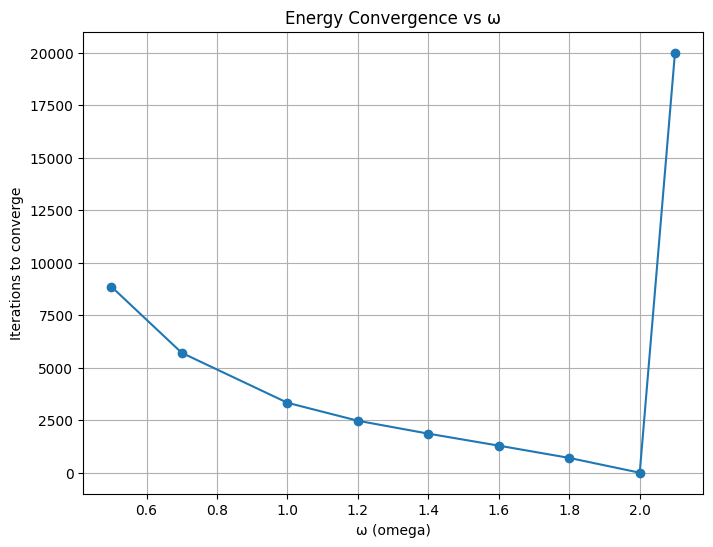

In [12]:
plt.figure(figsize=(8,6))
plt.plot(omega_values, iterations, marker='o')
plt.xlabel('ω (omega)')
plt.ylabel('Iterations to converge')
plt.title('Energy Convergence vs ω')
plt.grid()
plt.show()

Question 4:

In [13]:
mesh_sizes = [10, 20, 50, 100, 200]
energies = []

L = 1.0

In [14]:
for N in mesh_sizes:
    Nx = Ny = N
    h = L / (N - 1)
    phi = np.zeros((Nx, Ny))
    rho = np.zeros((Nx, Ny))

    dipole_pos = [(Nx//3, Ny//2), (2*Nx//3, Ny//2)]
    rho[dipole_pos[0]] = 1.0/h
    rho[dipole_pos[1]] = -1.0/h

    phi[0, :] = 0
    phi[-1, :] = 0
    phi[:, 0] = 0
    phi[:, -1] = 0

    phi, _ = gauss_seidel(phi, rho, h, omega=1.5, tol=1e-8, max_iter=10000)

    energy = compute_energy(phi, rho, h)
    energies.append(energy)
    print(f"N={N}, Energy={energy}")

omega=1.5: Converged after 12 iterations (energy)
N=10, Energy=-0.004920121150541176
omega=1.5: Converged after 35 iterations (energy)
N=20, Energy=-0.0014635126201694131
omega=1.5: Converged after 95 iterations (energy)
N=50, Energy=-0.000280719177561724
omega=1.5: Converged after 196 iterations (energy)
N=100, Energy=-7.920826330556288e-05
omega=1.5: Converged after 177 iterations (energy)
N=200, Energy=-2.0648850321903655e-05


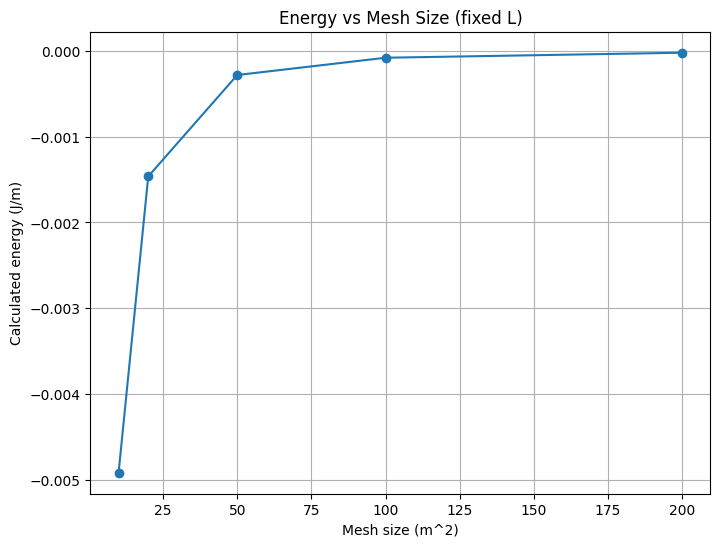

In [15]:
plt.figure(figsize=(8,6))
plt.plot(mesh_sizes, energies, marker='o')
plt.xlabel('Mesh size (m^2)')
plt.ylabel('Calculated energy (J/m)')
plt.title('Energy vs Mesh Size (fixed L)')
plt.grid()
plt.show()

Question 5:

In [16]:
N = 101
L = 1.0
h = L / (N - 1)

dipole_distance = 10
min_dist = 2
max_dist = N - dipole_distance - 2

distances = []
energies = []

In [17]:
for d in range(min_dist, max_dist, 10):
    phi = np.zeros((N, N))
    rho = np.zeros((N, N))
    
    y = N // 2
    x1 = d
    x2 = d + dipole_distance
    rho[x1, y] = 1.0/h
    rho[x2, y] = -1.0/h

    phi[0, :] = 0
    phi[-1, :] = 0
    phi[:, 0] = 0
    phi[:, -1] = 0

    phi, _ = gauss_seidel(phi, rho, h, omega=1.5, tol=1e-12, max_iter=10000)
    energy = compute_energy(phi, rho, h)

    distances.append(d * h)
    energies.append(energy)

omega=1.5: Converged after 1438 iterations (energy)
omega=1.5: Converged after 1407 iterations (energy)
omega=1.5: Converged after 1331 iterations (energy)
omega=1.5: Converged after 1181 iterations (energy)
omega=1.5: Converged after 813 iterations (energy)
omega=1.5: Converged after 889 iterations (energy)
omega=1.5: Converged after 1218 iterations (energy)
omega=1.5: Converged after 1367 iterations (energy)
omega=1.5: Converged after 1447 iterations (energy)


In [18]:
print(f"Distances: {distances}")
print(f"Energies: {energies}")

Distances: [0.02, 0.12, 0.22, 0.32, 0.42, 0.52, 0.62, 0.72, 0.8200000000000001]
Energies: [-5.63794845810136e-05, -6.141381974490783e-05, -6.189082375164261e-05, -6.204092630310647e-05, -6.20907537496523e-05, -6.20790192000394e-05, -6.199776649333881e-05, -6.177047873185436e-05, -6.084492164795728e-05]


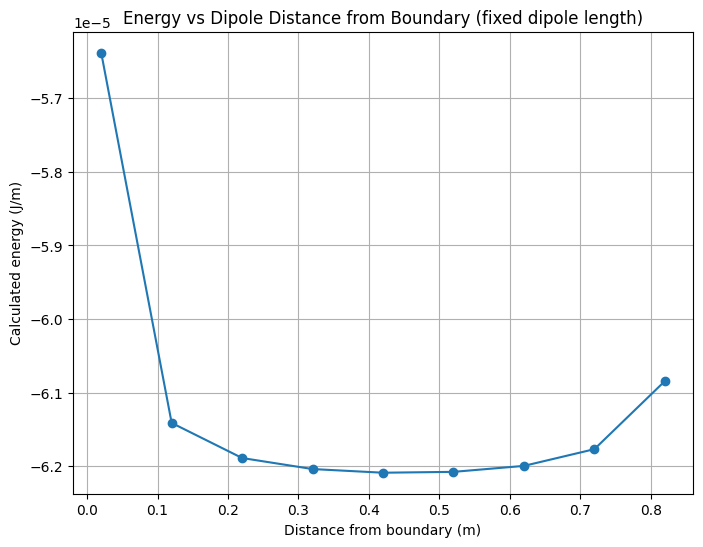

In [19]:
plt.figure(figsize=(8,6))
plt.plot(distances, energies, marker='o')
plt.xlabel('Distance from boundary (m)')
plt.ylabel('Calculated energy (J/m)')
plt.title('Energy vs Dipole Distance from Boundary (fixed dipole length)')
plt.grid()
plt.show()

In [20]:
N = 401

In [21]:
distances = []
energies = []

for d in range(min_dist, max_dist, 20):
    phi = np.zeros((N, N))
    rho = np.zeros((N, N))
    y = N // 2
    x1 = d
    x2 = d + dipole_distance
    rho[x1, y] = 1.0/h
    rho[x2, y] = -1.0/h

    phi[0, :] = 0
    phi[-1, :] = 0
    phi[:, 0] = 0
    phi[:, -1] = 0

    phi, _ = gauss_seidel(phi, rho, h, omega=1.5, tol=1e-8, max_iter=10000)
    energy = compute_energy(phi, rho, h)

    distances.append(d * h)
    energies.append(energy)

omega=1.5: Converged after 100 iterations (energy)
omega=1.5: Converged after 72 iterations (energy)
omega=1.5: Converged after 81 iterations (energy)
omega=1.5: Converged after 81 iterations (energy)
omega=1.5: Converged after 81 iterations (energy)


In [22]:
print(f"Distances: {distances}")
print(f"Energies: {energies}")

Distances: [0.02, 0.22, 0.42, 0.62, 0.8200000000000001]
Energies: [-5.552688803714991e-05, -6.14005694452018e-05, -6.156407178144915e-05, -6.156410124596794e-05, -6.15641012459692e-05]


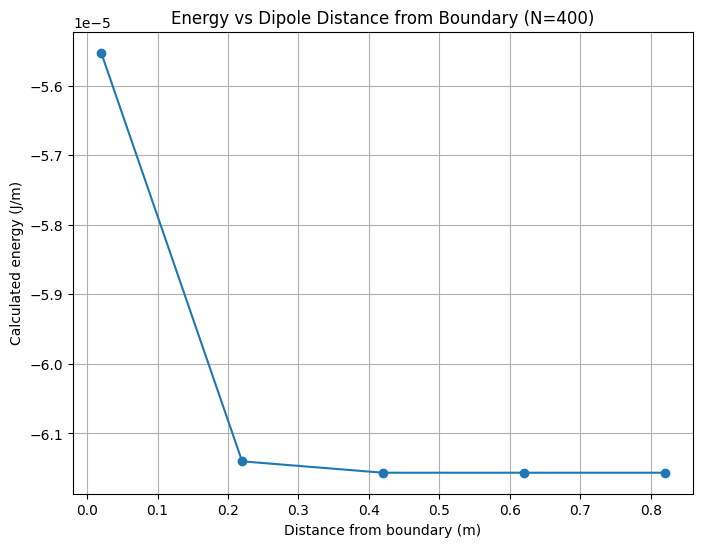

In [23]:
plt.figure(figsize=(8,6))
plt.plot(distances, energies, marker='o')
plt.xlabel('Distance from boundary (m)')
plt.ylabel('Calculated energy (J/m)')
plt.title('Energy vs Dipole Distance from Boundary (N=400)')
plt.grid()
plt.show()

Question 6:

In [24]:
N = 101
L = 1.0
h = L / (N - 1)

phi = np.zeros((N, N))
rho = np.zeros((N, N))

In [25]:
cage_start = N // 4
cage_end = 3 * N // 4

for i in range(cage_start, cage_end + 1):
    phi[cage_start, i] = -0.01
    phi[cage_end, i] = -0.01
    phi[i, cage_start] = -0.01
    phi[i, cage_end] = -0.01

rho[N//2, N//2] = 1.0/h

In [26]:
phi[0, :] = 0
phi[-1, :] = 0
phi[:, 0] = 0
phi[:, -1] = 0

In [27]:
def gauss_seidel_faraday(phi, rho, h, omega=1.5, tol=1e-14, max_iter=10000):
    Nx, Ny = phi.shape
    energy_old = compute_energy(phi, rho, h)
    for it in range(max_iter):
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                if (i == cage_start or i == cage_end or j == cage_start or j == cage_end) and (cage_start <= i <= cage_end and cage_start <= j <= cage_end):
                    continue
                phi_new = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])
                phi[i, j] = (1 - omega) * phi[i, j] + omega * phi_new
        energy_new = compute_energy(phi, rho, h)
        if abs(energy_new - energy_old) < tol:
            break
        energy_old = energy_new
    return phi

In [28]:
phi = gauss_seidel_faraday(phi, rho, h)

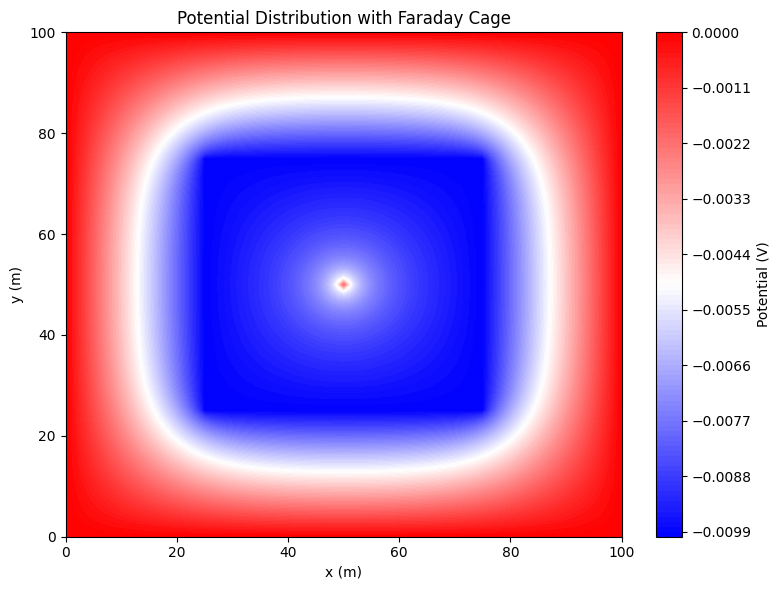

In [29]:
plt.figure(figsize=(8, 6))
plt.contourf(phi, levels=100, cmap='bwr')
plt.colorbar(label='Potential (V)')
plt.title('Potential Distribution with Faraday Cage')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.show()

Question 7:

In [30]:
N = 201
L = 1.0
h = L / (N - 1)

phi = np.zeros((N, N))
rho = np.zeros((N, N))

In [31]:
phi[0, :] = 0.01
phi[-1, :] = 0.01
phi[:, 0] = 0.01
phi[:, -1] = 0.01

In [32]:
plate1_y = N // 3
plate2_y = 2 * N // 3
plate_x_start = N // 8
plate_x_end = 7 * N // 8

In [33]:
phi[plate_x_start:plate_x_end, plate1_y] = 1.0
phi[plate_x_start:plate_x_end, plate2_y] = -1.0

In [34]:
def gauss_seidel_capacitor(phi, rho, h, omega=1.5, tol=1e-10, max_iter=10000):
    Nx, Ny = phi.shape
    energy_old = compute_energy(phi, rho, h)
    for it in range(max_iter):
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                if (plate_x_start <= i < plate_x_end) and (j == plate1_y or j == plate2_y):
                    continue
                phi_new = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])
                phi[i, j] = (1 - omega) * phi[i, j] + omega * phi_new
        energy_new = compute_energy(phi, rho, h)
        if abs(energy_new - energy_old) < tol:
            break
        energy_old = energy_new
    return phi

In [35]:
phi = gauss_seidel_capacitor(phi, rho, h)

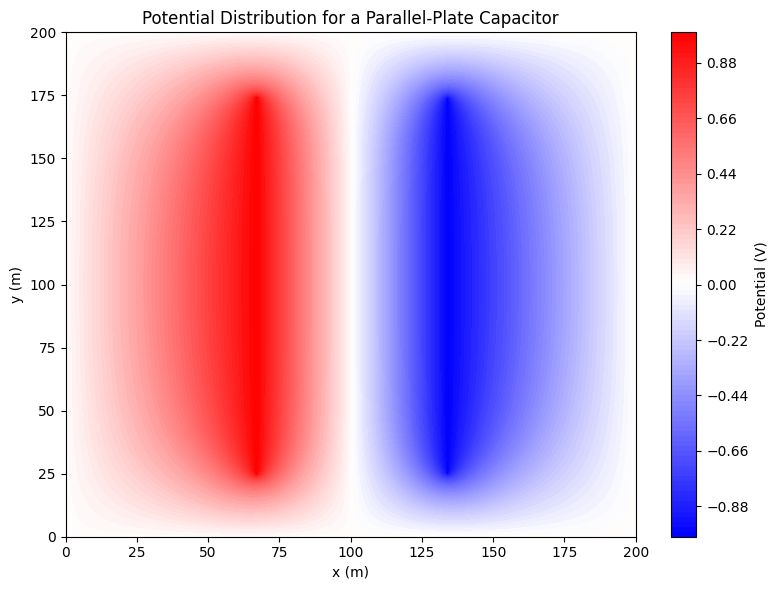

In [36]:
plt.figure(figsize=(8, 6))
plt.contourf(phi, levels=100, cmap='bwr')
plt.colorbar(label='Potential (V)')
plt.title('Potential Distribution for a Parallel-Plate Capacitor')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.show()

In [37]:
x = (plate_x_start + plate_x_end) // 2
potential_profile = phi[x, plate1_y:plate2_y+1]

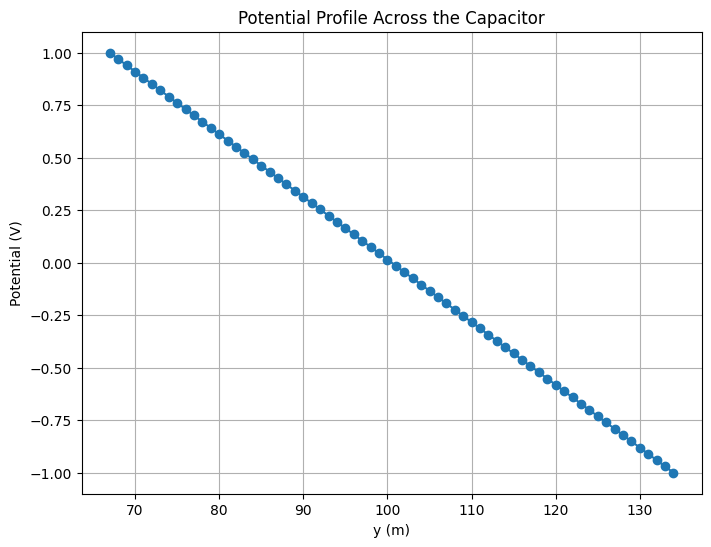

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(plate1_y, plate2_y+1), potential_profile, marker='o')
plt.xlabel('y (m)')
plt.ylabel('Potential (V)')
plt.title('Potential Profile Across the Capacitor')
plt.grid()
plt.show()

Question 8:

In [39]:
Nx = Ny = 101
L = 1.0
h = L / (Nx - 1)

In [40]:
def apply_dirichlet_bc(phi, value=0):
    phi[0, :] = value
    phi[-1, :] = value
    phi[:, 0] = value
    phi[:, -1] = value
    return phi

In [41]:
def apply_neumann_bc(phi):
    phi[0, :] = phi[1, :]
    phi[-1, :] = phi[-2, :]
    phi[:, 0] = phi[:, 1]
    phi[:, -1] = phi[:, -2]
    return phi

In [42]:
def apply_periodic_bc(phi):
    phi[0, :] = phi[-2, :]
    phi[-1, :] = phi[1, :]
    phi[:, 0] = phi[:, -2]
    phi[:, -1] = phi[:, 1]
    return phi

In [43]:
def gauss_seidel(phi, rho, h, omega=1.5, bc_type='dirichlet', tol=1e-14, max_iter=10000, value=0):
    Nx, Ny = phi.shape
    energy_old = compute_energy(phi, rho, h)

    for it in range(max_iter):
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):

                phi[i, j] = (1 - omega) * phi[i, j] + omega * 0.25 * (
                    phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j]
                )

        if bc_type == 'neumann':
            phi = apply_neumann_bc(phi)
        elif bc_type == 'periodic':
            phi = apply_periodic_bc(phi)
        else:
            phi = apply_dirichlet_bc(phi, value)
        
        energy_new = compute_energy(phi, rho, h)

        if abs(energy_new - energy_old) < tol:
            print(f'Converged after {it} iterations (energy)')
            break

        energy_old = energy_new

    else:
        print('Did not converge')
        
    return phi, it

In [44]:
bc_types = ['dirichlet', 'neumann', 'periodic']
titles = ['Dirichlet BC', 'Neumann BC', 'Periodic BC']

Converged after 1574 iterations (energy)


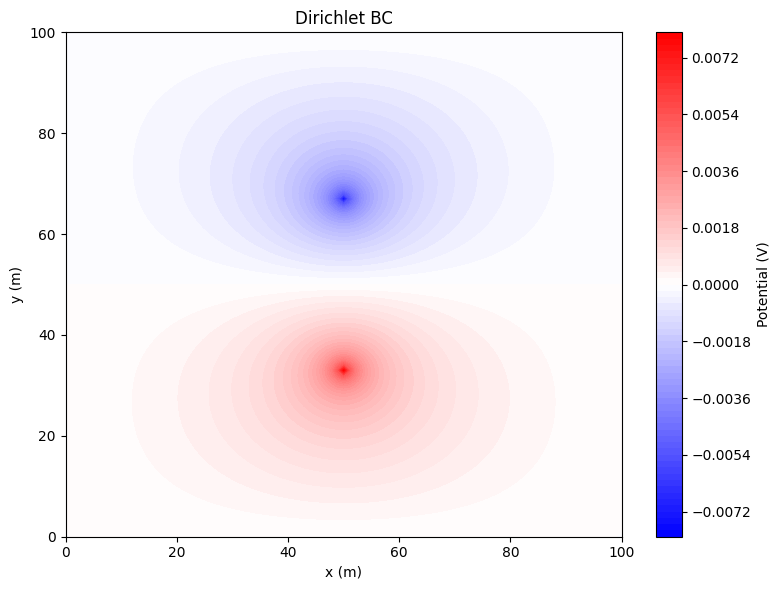

Converged after 3461 iterations (energy)


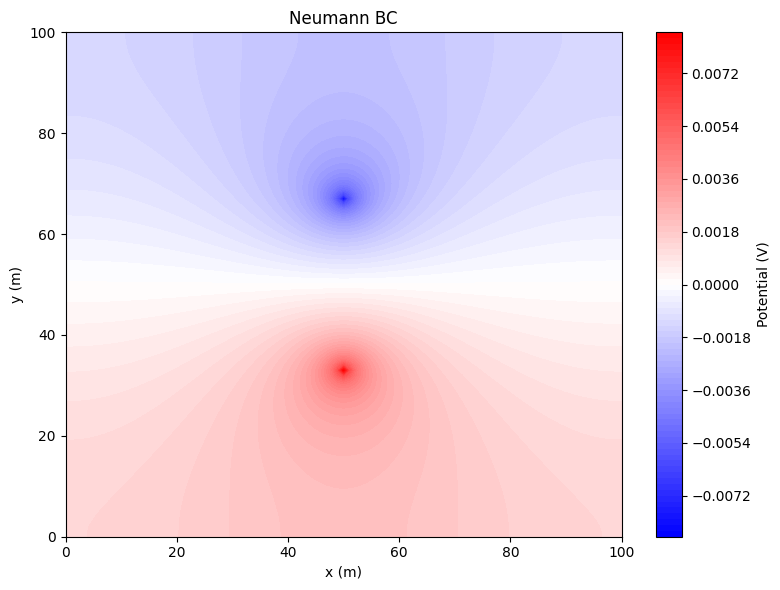

Converged after 717 iterations (energy)


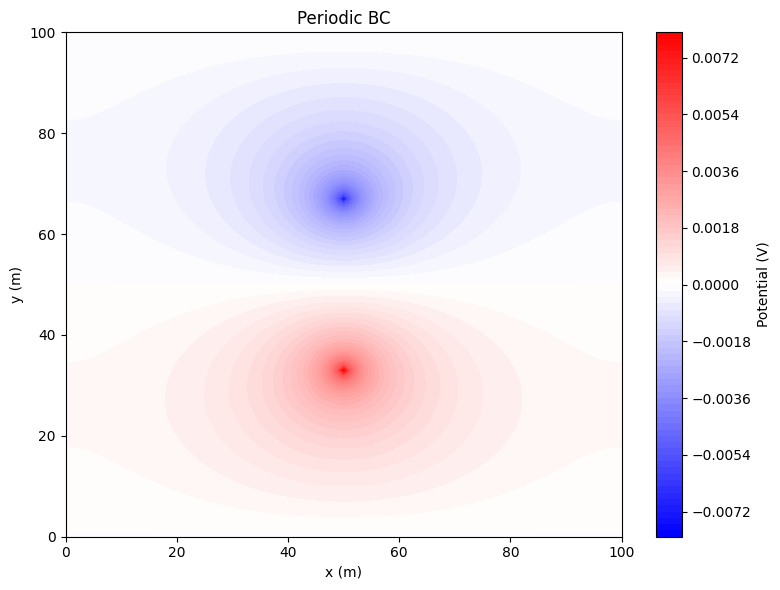

In [45]:
for idx, bc in enumerate(bc_types):
    phi = np.zeros((Nx, Ny))
    rho = np.zeros((Nx, Ny))
    dipole_pos = [(Nx//3, Ny//2), (2*Nx//3, Ny//2)]
    rho[dipole_pos[0]] = 1.0/h
    rho[dipole_pos[1]] = -1.0/h

    phi, _ = gauss_seidel(phi, rho, h, omega=1.5, bc_type=bc, tol=1e-14, max_iter=10000, value=0)

    plt.figure(figsize=(8, 6))
    plt.contourf(phi, levels=100, cmap='bwr')
    plt.colorbar(label='Potential (V)')
    plt.title(titles[idx])
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.tight_layout()
    plt.show()

Question 9:

In [46]:
Nx = Ny = 101
L = 1.0
h = L / (Nx - 1)
center = Nx // 2
y = Ny // 2
sep = 48

Converged after 908 iterations (energy)


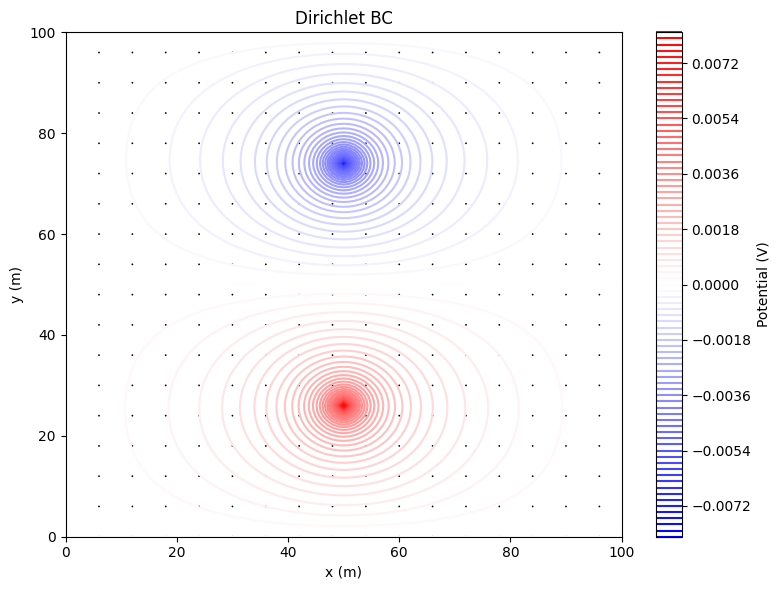

Converged after 3280 iterations (energy)


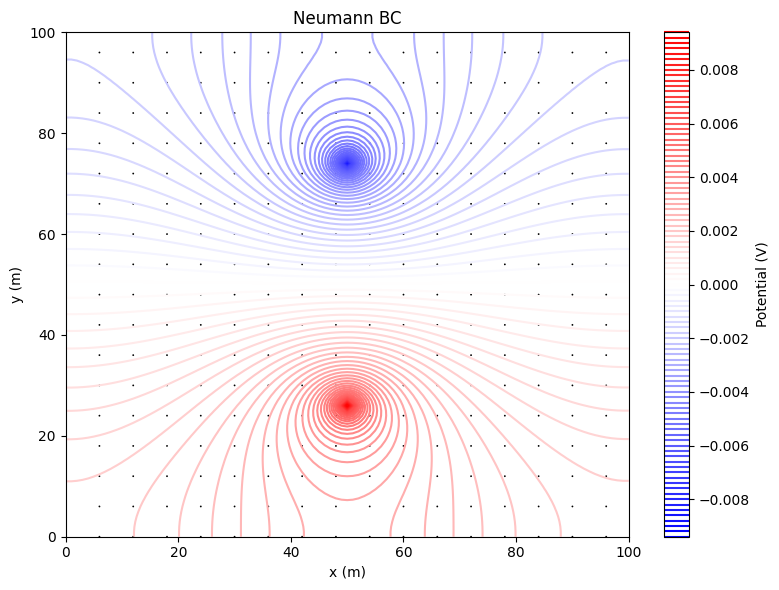

Converged after 681 iterations (energy)


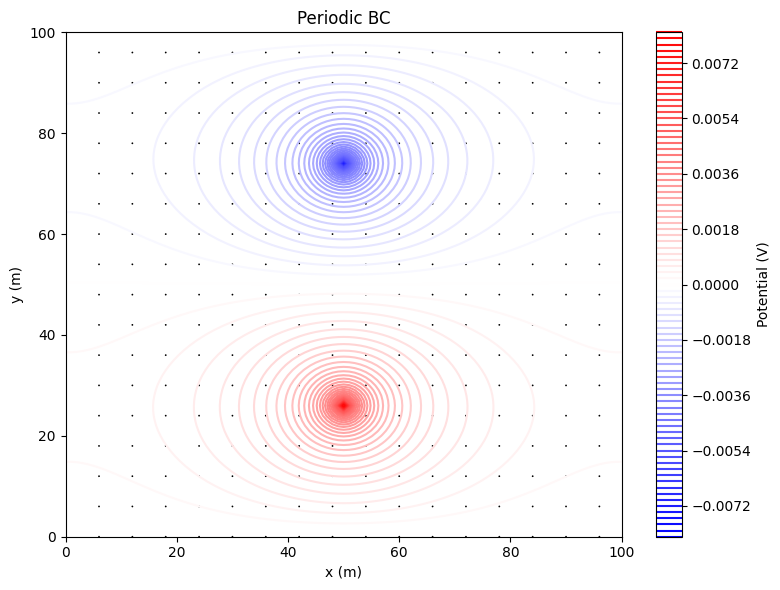

In [ ]:
for idx, bc in enumerate(bc_types):
    phi = np.zeros((Nx, Ny))
    rho = np.zeros((Nx, Ny))
    x1 = center - sep // 2
    x2 = center + sep // 2
    rho[x1, y] = 1.0 / h
    rho[x2, y] = -1.0 / h

    phi, _ = gauss_seidel(phi, rho, h, omega=1.5, bc_type=bc, tol=1e-12, max_iter=10000, value=0)

    plt.figure(figsize=(8, 6))
    plt.contour(phi, levels=100, cmap='bwr')
    plt.colorbar(label='Potential (V)')
    plt.title(f'{titles[idx]}')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')

    Ey, Ex = np.gradient(-phi, h)
    skip = 6
    plt.quiver(np.arange(0, Nx, skip), np.arange(0, Ny, skip),
               Ex[::skip, ::skip], Ey[::skip, ::skip], color='k', scale=100)

    plt.tight_layout()
    plt.show()

Question 10:

In [48]:
phi = np.zeros((Nx, Ny))
rho = np.zeros((Nx, Ny))
rho[Nx//2, Ny//2] = 1.0 / h

phi, it = gauss_seidel(phi, rho, h, omega=1.5, bc_type='periodic', tol=1e-12, max_iter=10000)

Did not converge


In [49]:
print(it, "iterations for periodic boundary conditions")

9999 iterations for periodic boundary conditions


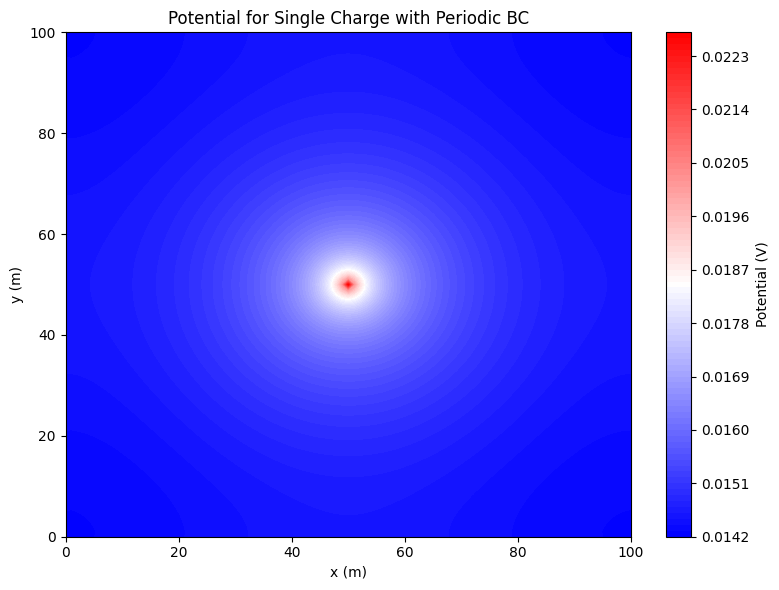

In [50]:
plt.figure(figsize=(8,6))
plt.contourf(phi, levels=100, cmap='bwr')
plt.colorbar(label='Potential (V)')
plt.title('Potential for Single Charge with Periodic BC')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.show()

Question 11:

In [51]:
def create_centered_charge_distribution(Nx, Ny, d_sep):
    rho = np.zeros((Nx, Ny))
    cx = Nx // 2
    cy = Ny // 2
    pos1 = (cx - d_sep, cy)
    pos2 = (cx + d_sep, cy)
    
    if pos1[0] < 0 or pos1[0] >= Nx or pos2[0] < 0 or pos2[0] >= Nx:
        raise ValueError("Separation exceeds grid bounds.")
    
    charge = 1.0 / h
    rho[pos1] = charge
    rho[pos2] = -charge
    return rho

In [52]:
L = 1.0
Nx, Ny = 100, 100
h = L / (Nx - 1)
omega = 1.5
d_seps = np.arange(1, 41, 2)
energies = []
all_energies = {}

Converged after 18 iterations (energy)
Converged after 50 iterations (energy)
Converged after 82 iterations (energy)
Converged after 111 iterations (energy)
Converged after 137 iterations (energy)
Converged after 158 iterations (energy)
Converged after 175 iterations (energy)
Converged after 188 iterations (energy)
Converged after 199 iterations (energy)
Converged after 206 iterations (energy)
Converged after 211 iterations (energy)
Converged after 214 iterations (energy)
Converged after 215 iterations (energy)
Converged after 213 iterations (energy)
Converged after 210 iterations (energy)
Converged after 204 iterations (energy)
Converged after 196 iterations (energy)
Converged after 185 iterations (energy)
Converged after 170 iterations (energy)
Converged after 152 iterations (energy)
Converged after 18 iterations (energy)
Converged after 50 iterations (energy)
Converged after 82 iterations (energy)
Converged after 114 iterations (energy)
Converged after 151 iterations (energy)
Conver

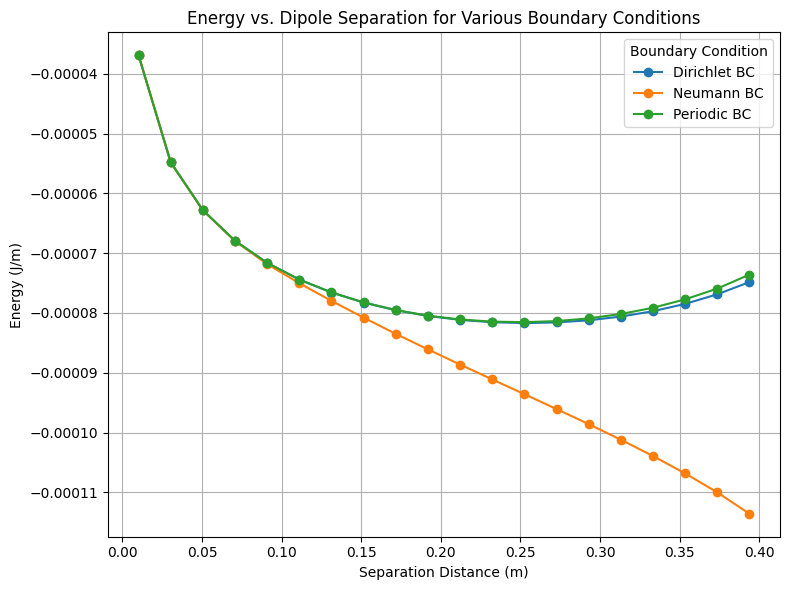

In [53]:
plt.figure(figsize=(8, 6))

for idx, bc in enumerate(bc_types):
    energies = []
    for d in d_seps:
        phi = np.zeros((Nx, Ny))
        rho = create_centered_charge_distribution(Nx, Ny, d_sep=d)
        phi, it = gauss_seidel(phi, rho, h, omega=omega, bc_type=bc, tol=1e-8, value=0)
        energy = compute_energy(phi[1:-1, 1:-1], rho[1:-1, 1:-1], h)
        energies.append(energy)
    all_energies[bc] = energies
    plt.plot(d_seps * h, energies, 'o-', label=titles[idx])

plt.xlabel('Separation Distance (m)')
plt.ylabel('Energy (J/m)')
plt.title('Energy vs. Dipole Separation for Various Boundary Conditions')
plt.grid()
plt.legend(title='Boundary Condition')
plt.tight_layout()
plt.show()

In [54]:
print(f"Distances: {d_seps * h}")
print(f"Energies Dirichlet: {all_energies[bc_types[0]]}")
print(f"Energies Neumann: {all_energies[bc_types[1]]}")
print(f"Energies Periodic: {all_energies[bc_types[2]]}")

Distances: [0.01010101 0.03030303 0.05050505 0.07070707 0.09090909 0.11111111
 0.13131313 0.15151515 0.17171717 0.19191919 0.21212121 0.23232323
 0.25252525 0.27272727 0.29292929 0.31313131 0.33333333 0.35353535
 0.37373737 0.39393939]
Energies Dirichlet: [-3.6919744155413414e-05, -5.48266520659777e-05, -6.282345614106184e-05, -6.79419808574453e-05, -7.163346462806395e-05, -7.442323643574261e-05, -7.658208113132084e-05, -7.825416632022277e-05, -7.954713328384333e-05, -8.04958695778841e-05, -8.11568901224507e-05, -8.15530603229449e-05, -8.169738195980717e-05, -8.158386413493846e-05, -8.123180617948922e-05, -8.060903589563926e-05, -7.970745503611794e-05, -7.848497925773446e-05, -7.688228377630293e-05, -7.483752445445883e-05]
Energies Neumann: [-3.691974415549079e-05, -5.482666304873094e-05, -6.2824409778785e-05, -6.798291196024956e-05, -7.183448738955487e-05, -7.503491074134825e-05, -7.798182328858517e-05, -8.078876955582313e-05, -8.349611634571689e-05, -8.609230040259378e-05, -8.8623034

In [55]:
#EOF